In [1]:
pwd

'C:\\Users\\EDWARD\\churn homogeneous RF'

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
Churn_modelling = pd.read_csv('Churn_modelling.csv')

In [4]:
Churn_modelling

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df = pd.read_csv(r'Churn_Modelling.csv')

In [7]:
#drop the unnecessary columns

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
#encode categorical variables

df = pd.get_dummies(df, columns=['Geography', 'Gender'])

In [9]:
#split the data

X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#creating a homogenous ensemble random forest classifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
#train the model

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
#make predictions on the testing data

y_pred = rf.predict(X_test)

In [13]:
#evaluting performance of the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#calculate accuracy

print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.865


In [14]:
#calculate precision

print('Precision:', precision_score(y_test, y_pred))

Precision: 0.7510204081632653


In [15]:
#calculate recall

print('Recall:', recall_score(y_test, y_pred))

Recall: 0.4681933842239186


In [16]:
#calculate F1 score

print('F1 score:', f1_score(y_test, y_pred))

F1 score: 0.5768025078369905


In [17]:
#plot confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

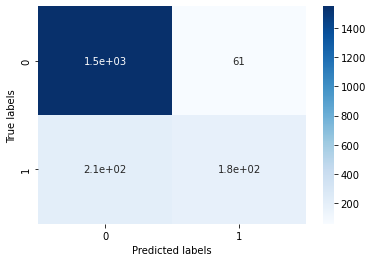

In [18]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [19]:
#get feature importances

importances = rf.feature_importances_

In [20]:
# sort by importance and print ranking

indices = np.argsort(importances)[::-1]
print('Feature ranking:')
for i in range(X.shape[1]):
    print('%d. %s (%f)' % (i + 1, X.columns[indices[i]], importances[indices[i]]))

Feature ranking:
1. Age (0.241642)
2. EstimatedSalary (0.145578)
3. CreditScore (0.142544)
4. Balance (0.139673)
5. NumOfProducts (0.130713)
6. Tenure (0.083717)
7. IsActiveMember (0.038542)
8. Geography_Germany (0.021320)
9. HasCrCard (0.018347)
10. Gender_Male (0.010378)
11. Geography_France (0.009724)
12. Gender_Female (0.009145)
13. Geography_Spain (0.008676)


In [21]:
from sklearn.tree import plot_tree

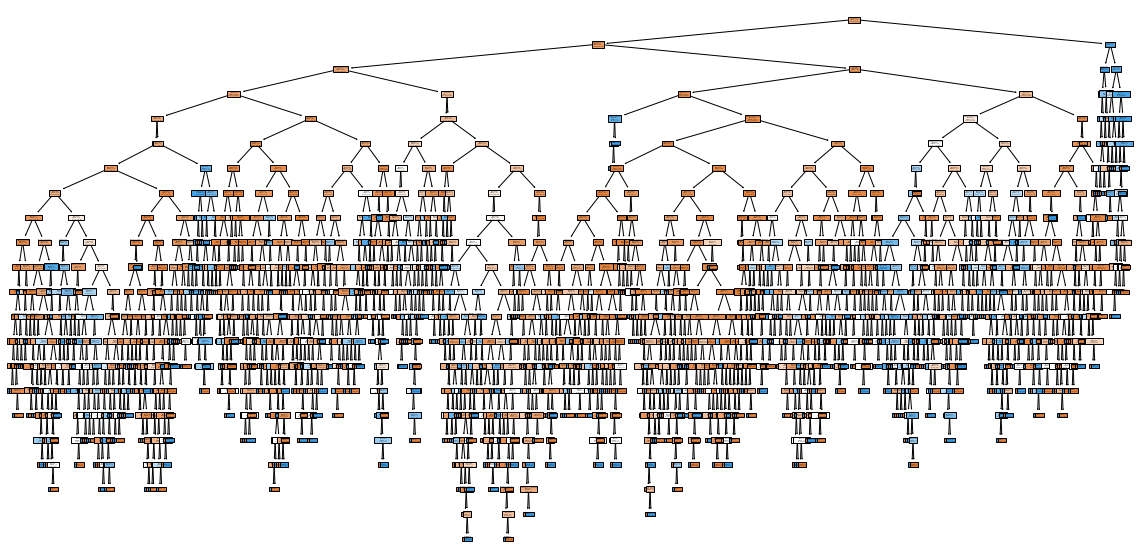

In [22]:
#plot the tree
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)
plt.show()